# task 2

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers# type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Load and preprocess the CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

 Define CNN model with regularization

In [4]:
def create_model(regularization=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    model.add(layers.Dense(10, activation='softmax'))
    return model

 Train and evaluate model with L1 regularization  (Lasso)

In [5]:
# (strength=0.001)
model_l1_001 = create_model(regularizers.l1(0.001))
model_l1_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_001 = model_l1_001.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_001_accuracy = model_l1_001.evaluate(x_test, y_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2245 - loss: 2.9904 - val_accuracy: 0.3678 - val_loss: 1.9403
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3627 - loss: 1.9185 - val_accuracy: 0.3799 - val_loss: 1.8749
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3951 - loss: 1.8292 - val_accuracy: 0.4131 - val_loss: 1.7628
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4177 - loss: 1.7600 - val_accuracy: 0.4220 - val_loss: 1.7326
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4282 - loss: 1.7275 - val_accuracy: 0.4358 - val_loss: 1.6961
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4384 - loss: 1.6969 - val_accuracy: 0.4341 - val_loss: 1.6929
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4457 - loss: 1.6821 - val_accuracy: 0.4522 - val_loss: 1.6517
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4557 - loss: 1.6548 - val_accurac

In [6]:
# (strength=0.01)
model_l1_01 = create_model(regularizers.l1(0.01))
model_l1_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_01 = model_l1_01.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_01_accuracy = model_l1_01.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1015 - loss: 8.8683 - val_accuracy: 0.1000 - val_loss: 2.4522
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0962 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4521
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0973 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4527
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0997 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4515
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0995 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4528
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0974 - loss: 2.4523 - val_accuracy: 0.1000 - val_loss: 2.4528
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1000 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4526
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0999 - loss: 2.4523 - val_accurac

In [7]:
# (strength=0.1)
model_l1_1 = create_model(regularizers.l1(0.1))
model_l1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_1 = model_l1_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_1_accuracy = model_l1_1.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.0971 - loss: 67.6310 - val_accuracy: 0.1000 - val_loss: 3.8036
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0984 - loss: 3.8128 - val_accuracy: 0.1000 - val_loss: 3.8076
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0998 - loss: 3.8125 - val_accuracy: 0.1000 - val_loss: 3.8177
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1003 - loss: 3.8126 - val_accuracy: 0.1000 - val_loss: 3.8069
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1018 - loss: 3.8123 - val_accuracy: 0.1000 - val_loss: 3.8176
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0991 - loss: 3.8127 - val_accuracy: 0.1000 - val_loss: 3.8115
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1006 - loss: 3.8124 - val_accuracy: 0.1000 - val_loss: 3.8146
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0987 - loss: 3.8122 - val_

Train and evaluate model with L2 regularization (Ridge)

In [8]:
# (strength=0.001)
model_l2_001 = create_model(regularizers.l2(0.001))
model_l2_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_001 = model_l2_001.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_001_accuracy = model_l2_001.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3052 - loss: 1.9720 - val_accuracy: 0.4750 - val_loss: 1.5364
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5130 - loss: 1.4598 - val_accuracy: 0.5514 - val_loss: 1.3501
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5693 - loss: 1.3219 - val_accuracy: 0.6019 - val_loss: 1.2429
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6072 - loss: 1.2359 - val_accuracy: 0.6179 - val_loss: 1.2060
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6364 - loss: 1.1744 - val_accuracy: 0.6285 - val_loss: 1.1781
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6562 - loss: 1.1308 - val_accuracy: 0.6451 - val_loss: 1.1550
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6728 - loss: 1.0840 - val_accuracy: 0.6530 - val_loss: 1.1328
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6904 - loss: 1.0428 - val_acc

In [9]:
# (strength=0.01)
model_l2_01 = create_model(regularizers.l2(0.01))
model_l2_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_01 = model_l2_01.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_01_accuracy = model_l2_01.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2642 - loss: 2.4371 - val_accuracy: 0.3568 - val_loss: 1.9239
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3944 - loss: 1.8279 - val_accuracy: 0.4509 - val_loss: 1.6992
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4483 - loss: 1.7232 - val_accuracy: 0.4901 - val_loss: 1.6519
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4775 - loss: 1.6653 - val_accuracy: 0.4537 - val_loss: 1.7142
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4951 - loss: 1.6209 - val_accuracy: 0.4784 - val_loss: 1.6646
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5090 - loss: 1.5947 - val_accuracy: 0.5022 - val_loss: 1.6317
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5273 - loss: 1.5680 - val_accuracy: 0.5100 - val_loss: 1.5865
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5326 - loss: 1.5543 - val_accur

In [10]:
# (strength=0.1)
model_l2_1 = create_model(regularizers.l2(0.1))
model_l2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_1 = model_l2_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_1_accuracy = model_l2_1.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1036 - loss: 5.0230 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0993 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0960 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1016 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accura

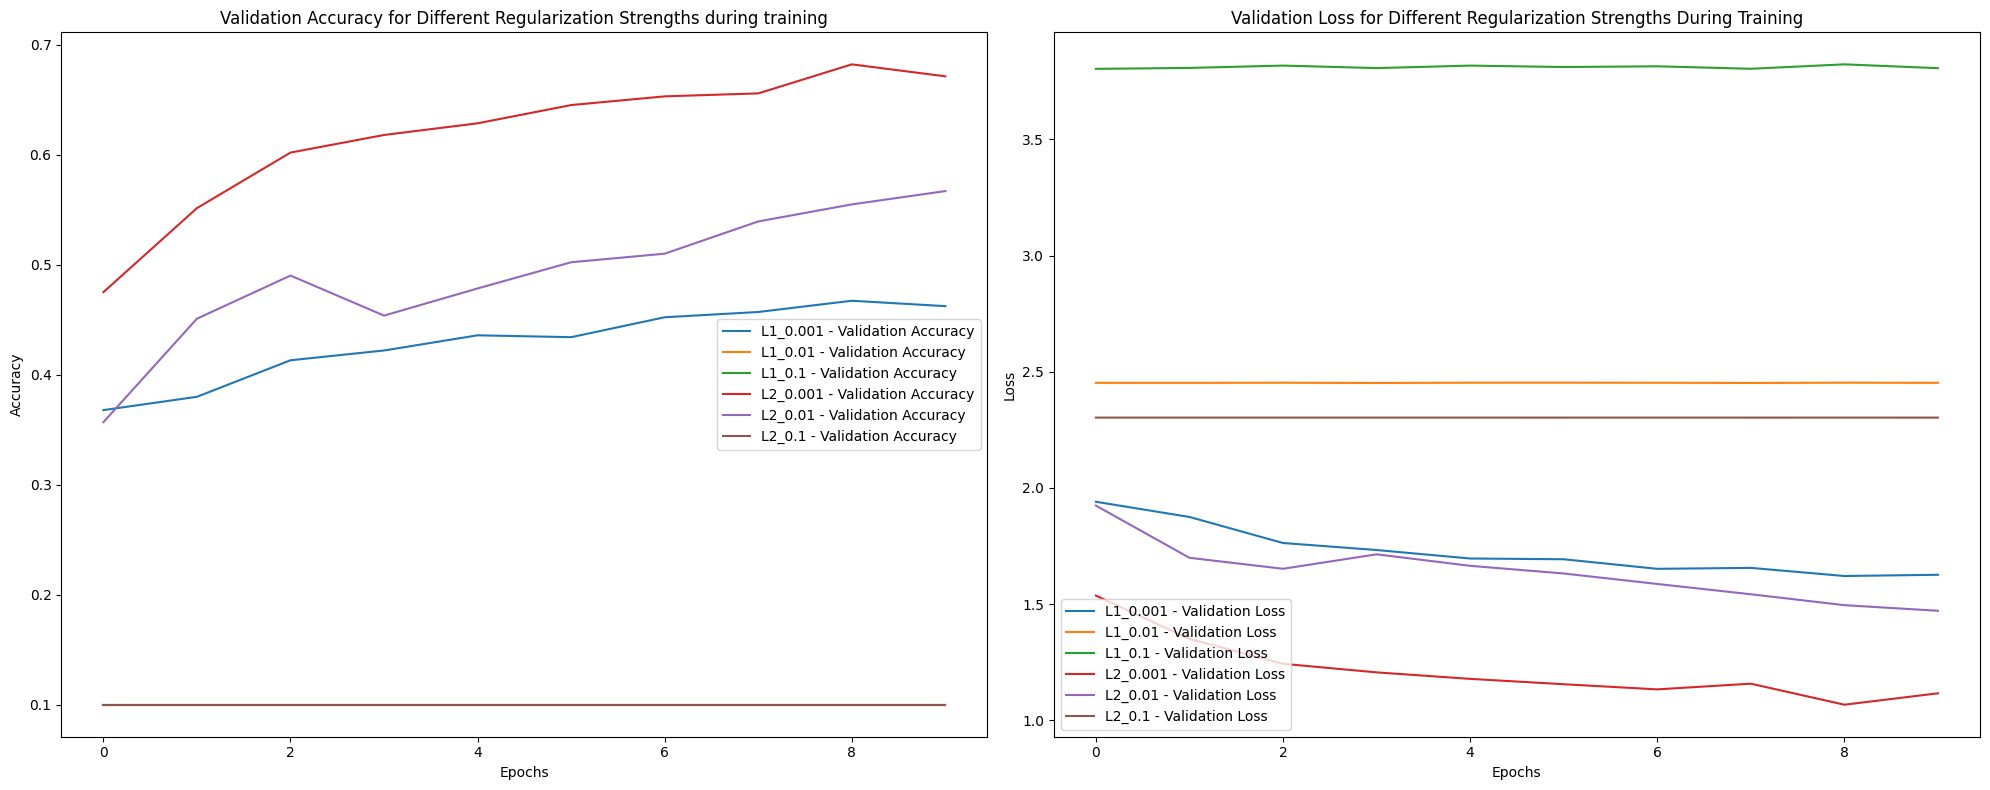

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot - Validation Accuracy
sns.lineplot(ax=axes[0], data=history_l1_001.history['val_accuracy'], label='L1_0.001 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l1_01.history['val_accuracy'], label='L1_0.01 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l1_1.history['val_accuracy'], label='L1_0.1 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_001.history['val_accuracy'], label='L2_0.001 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_01.history['val_accuracy'], label='L2_0.01 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_1.history['val_accuracy'], label='L2_0.1 - Validation Accuracy')

# Set titles and labels for the first plot
axes[0].set_title('Validation Accuracy for Different Regularization Strengths during training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Second subplot - Validation Loss
sns.lineplot(ax=axes[1], data=history_l1_001.history['val_loss'], label='L1_0.001 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l1_01.history['val_loss'], label='L1_0.01 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l1_1.history['val_loss'], label='L1_0.1 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_001.history['val_loss'], label='L2_0.001 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_01.history['val_loss'], label='L2_0.01 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_1.history['val_loss'], label='L2_0.1 - Validation Loss')

# Set titles and labels for the second plot
axes[1].set_title('Validation Loss for Different Regularization Strengths During Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
accuracies = [model_l1_001_accuracy[1], model_l1_01_accuracy [1], model_l2_1_accuracy[1], model_l2_001_accuracy[1], model_l2_01_accuracy[1], model_l2_1_accuracy[1]]
losses = [model_l1_001_accuracy[0], model_l1_01_accuracy [0], model_l2_1_accuracy[0], model_l2_001_accuracy[0], model_l2_01_accuracy[0], model_l2_1_accuracy[0]]
labels = ['L1_0.001', 'L1_0.01','L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1']
data = pd.DataFrame({
    'Regularization': labels,
    'Accuracy': accuracies,
    'Loss': losses
})
print(data)

  Regularization  Accuracy      Loss
0       L1_0.001    0.4623  1.626648
1        L1_0.01    0.1000  2.452203
2         L1_0.1    0.1000  2.302596
3       L2_0.001    0.6712  1.116748
4        L2_0.01    0.5669  1.471551
5         L2_0.1    0.1000  2.302596


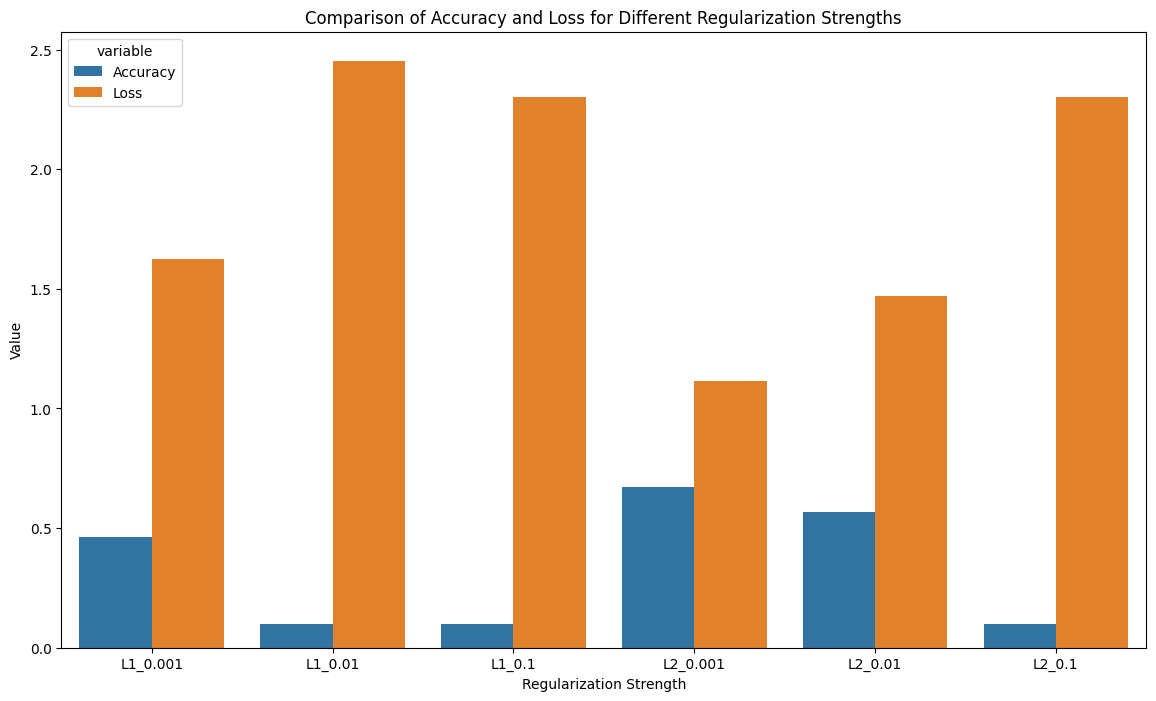

In [13]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Regularization', y='value', hue='variable', data=pd.melt(data, ['Regularization']))
plt.title('Comparison of Accuracy and Loss for Different Regularization Strengths')
plt.ylabel('Value')
plt.xlabel('Regularization Strength')
plt.show()

In [24]:
labels = ['L1_0.001', 'L1_0.01', 'L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1']
x = np.arange(len(labels))
train_accuracies = [
    history_l1_001.history['accuracy'][-1], history_l1_01.history['accuracy'][-1], history_l1_1.history['accuracy'][-1],
    history_l2_001.history['accuracy'][-1], history_l2_01.history['accuracy'][-1], history_l2_1.history['accuracy'][-1]
]

train_losses = [
    history_l1_001.history['loss'][-1], history_l1_01.history['loss'][-1], history_l1_1.history['loss'][-1],
    history_l2_001.history['loss'][-1], history_l2_01.history['loss'][-1], history_l2_1.history['loss'][-1]
]

eval_accuracies = [
    model_l1_001_accuracy[1], model_l1_01_accuracy[1], model_l1_1_accuracy[1],
    model_l2_001_accuracy[1], model_l2_01_accuracy[1], model_l2_1_accuracy[1]
]

eval_losses = [
    model_l1_001_accuracy[0], model_l1_01_accuracy[0], model_l1_1_accuracy[0],
    model_l2_001_accuracy[0], model_l2_01_accuracy[0], model_l2_1_accuracy[0]
]
data = {
    'Regularization': ['L1_0.001', 'L1_0.01', 'L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1'],
    'Training Accuracy': train_accuracies,
    'Evaluation Accuracy': eval_accuracies,
    'Training Loss': train_losses,
    'Evaluation Loss': eval_losses
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print(df)

  Regularization  Training Accuracy  Evaluation Accuracy  Training Loss  \
0       L1_0.001            0.47228               0.4623       1.616889   
1        L1_0.01            0.09966               0.1000       2.452327   
2         L1_0.1            0.09934               0.1000       3.812289   
3       L2_0.001            0.70406               0.6712       1.011299   
4        L2_0.01            0.55208               0.5669       1.506753   
5         L2_0.1            0.09612               0.1000       2.302762   

   Evaluation Loss  
0         1.626648  
1         2.452203  
2         3.806581  
3         1.116748  
4         1.471551  
5         2.302596  


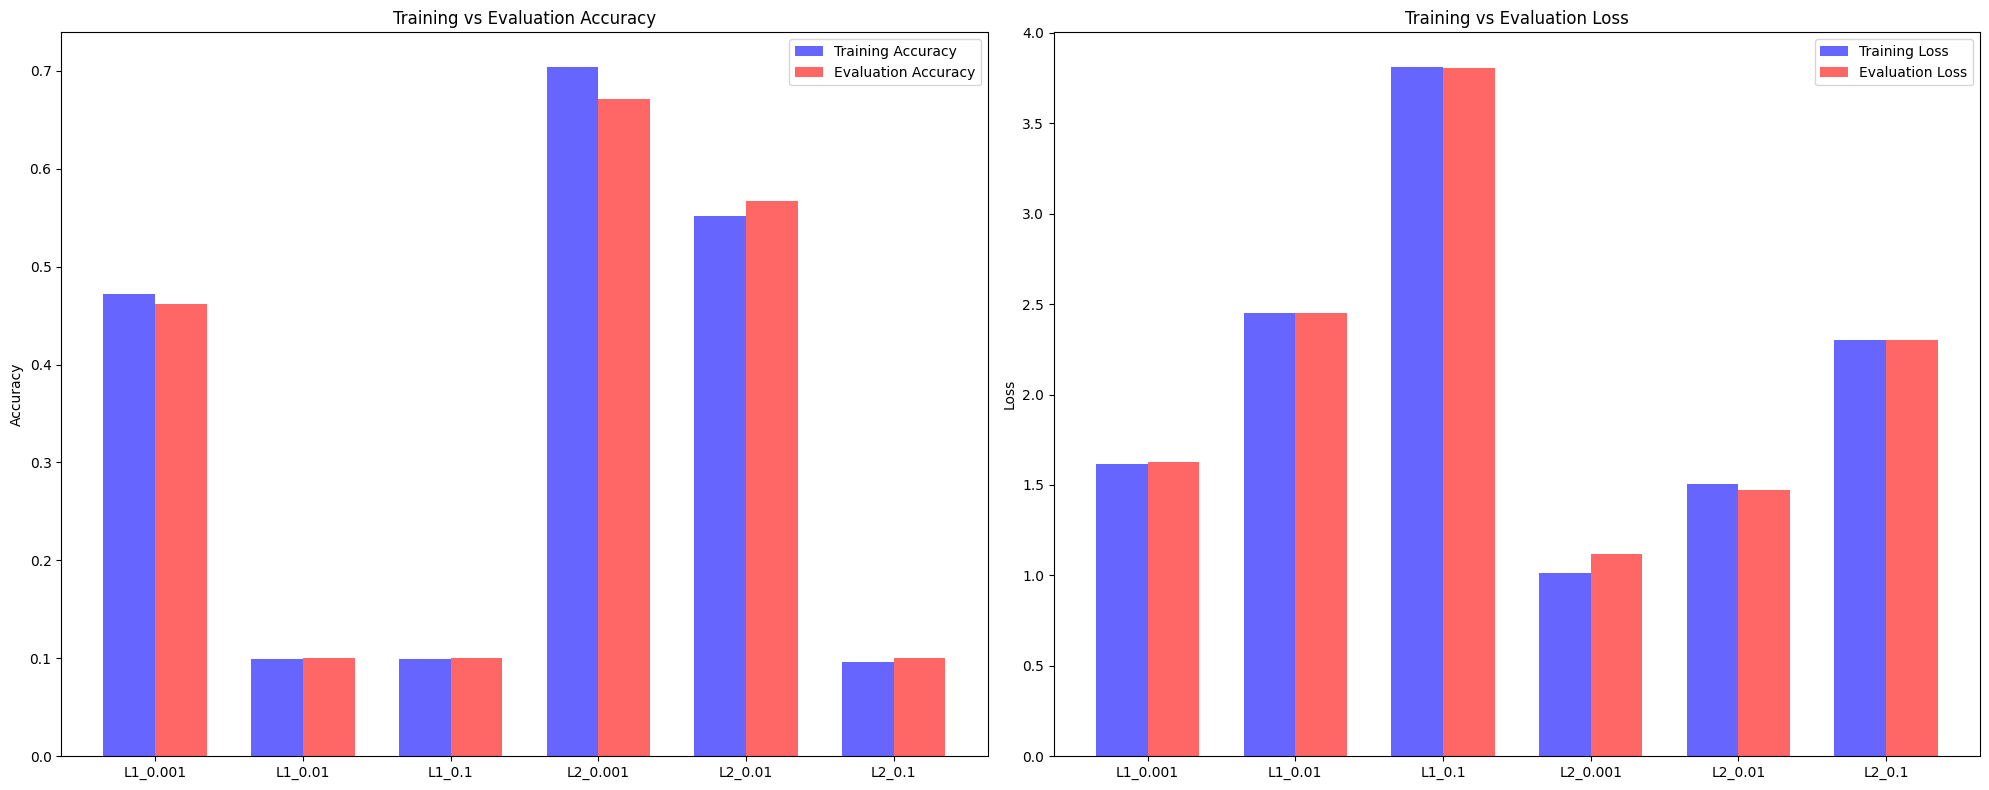

In [22]:
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(20, 8))


axes[0].bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='blue', alpha=0.6)
axes[0].bar(x + width/2, eval_accuracies, width, label='Evaluation Accuracy', color='red', alpha=0.6)
axes[0].set_title('Training vs Evaluation Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].legend()

axes[1].bar(x - width/2, train_losses, width, label='Training Loss', color='blue', alpha=0.6)
axes[1].bar(x + width/2, eval_losses, width, label='Evaluation Loss', color='red', alpha=0.6)
axes[1].set_title('Training vs Evaluation Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].legend()

plt.tight_layout()
plt.show()


# Report on Overfitting and Underfitting with Regularization on CIFAR-10

## Introduction
This report analyses the effects of different regularization techniques (L1 and L2) on the performance of a neural network trained on the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 colour images across 10 classes, making it a challenging task for image classification. The goal is to observe the training and evaluation accuracy and loss for various regularization strengths and to identify signs of overfitting and underfitting.
## Results Summary
The following table summarizes the training accuracy, evaluation accuracy, training loss, and evaluation loss for different regularization techniques and strengths:

|Regularization|	Training Accuracy|	Evaluation Accuracy|	Training Loss|	Evaluation Loss|
| --- | --- | --- | --- | --- |
|L1 (0.001)|	0.47228|	0.4623|	1.616889|	1.626648|
|L1 (0.01)|	0.09966|	0.1000|	2.452327|	2.452203|
|L1 (0.1)|	0.09934|	0.1000|	3.812289|	3.806581|
|L2 (0.001)|	0.70406|	0.6712|	1.011299|	1.116748|
|L2 (0.01)|	0.55208|	0.5669|	1.506753|	1.471551|
|L2 (0.1)|	0.09612|	0.1000|	2.302762|	2.302596|

## Observations:
1.	L1 Regularization:
-	L1_0.001:
    + Training Accuracy: 47.23%
    + Evaluation Accuracy: 46.23%
    + Interpretation: The model is underfitting, as indicated by the low accuracy and relatively high training and evaluation loss values. The regularization strength is too strong, penalizing the model's ability to learn effectively.
-   L1_0.01 & L1_0.1:
    + Training Accuracy: ~9.9%
    + Evaluation Accuracy: ~10.0%
    + Interpretation: Severe underfitting is observed with these higher L1 strengths. The model fails to learn, as evidenced by the minimal difference between training and evaluation accuracy, which hovers around chance level.
2.	L2 Regularization:
-	L2_0.001:
    + Training Accuracy: 70.41%
    + Evaluation Accuracy: 67.12%
    + Interpretation: This configuration achieves the best balance, indicating appropriate regularization that reduces overfitting while maintaining model complexity.
-	L2_0.01:
    + Training Accuracy: 55.21%
    + Evaluation Accuracy: 56.69%
    + Interpretation: The model starts to underfit as the regularization strength increases, with a noticeable drop in both training and evaluation accuracy.
-	L2_0.1:
    + Training Accuracy: 9.61%
    + Evaluation Accuracy: 10.00%
    + Interpretation: Severe underfitting is evident, as the model's performance is significantly hindered by the high regularization strength.

## Justification for Chosen Regularization Strength
Based on the observations, the L2 regularization with a strength of 0.001 appears to be the most effective choice for the CIFAR-10 dataset. This configuration achieves the highest training accuracy (0.70406) and a reasonably high evaluation accuracy (0.6712), indicating a good balance between fitting the training data and generalizing to unseen data.
-	Avoiding Overfitting: The relatively low training and evaluation losses suggest that the model is not overfitting significantly, which is crucial for maintaining performance on unseen data.
-	Effective Learning: The model with L2 (0.001) regularization is able to learn meaningful patterns from the data without being overly constrained by regularization, which is evident from its performance metrics.
-	Excessive Regularization: Higher regularization strengths (L1 and L2 at 0.01 and 0.1) led to underfitting, as indicated by the low accuracies and high losses. This suggests that the model was too restricted to learn effectively from the training data.

## Conclusion
In conclusion, the analysis of the CIFAR-10 dataset reveals that regularization plays a critical role in managing overfitting and underfitting. The L2 regularization with a strength of 0.001 provides the best balance, yielding the highest accuracy while minimizing loss, thus allowing the model to generalize effectively. Further experiments with different regularization techniques or hyperparameters may be beneficial to optimize performance further.


